In [24]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import time
import datetime
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from mpl_toolkits.basemap import Basemap, cm
import cmocean
%matplotlib inline
#%matplotlib qt

In [3]:
grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02").sel(gridX = slice(10, 364), gridY = slice(200, 739))
grid1 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02")

In [4]:
nemo_mask = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil.sel(gridX = slice(10, 364), gridY = slice(200, 739)) 
nemo_mask1 = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil 

In [5]:
lat = grid.latitude
lon = grid.longitude

/home/abhudia/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/abhudia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


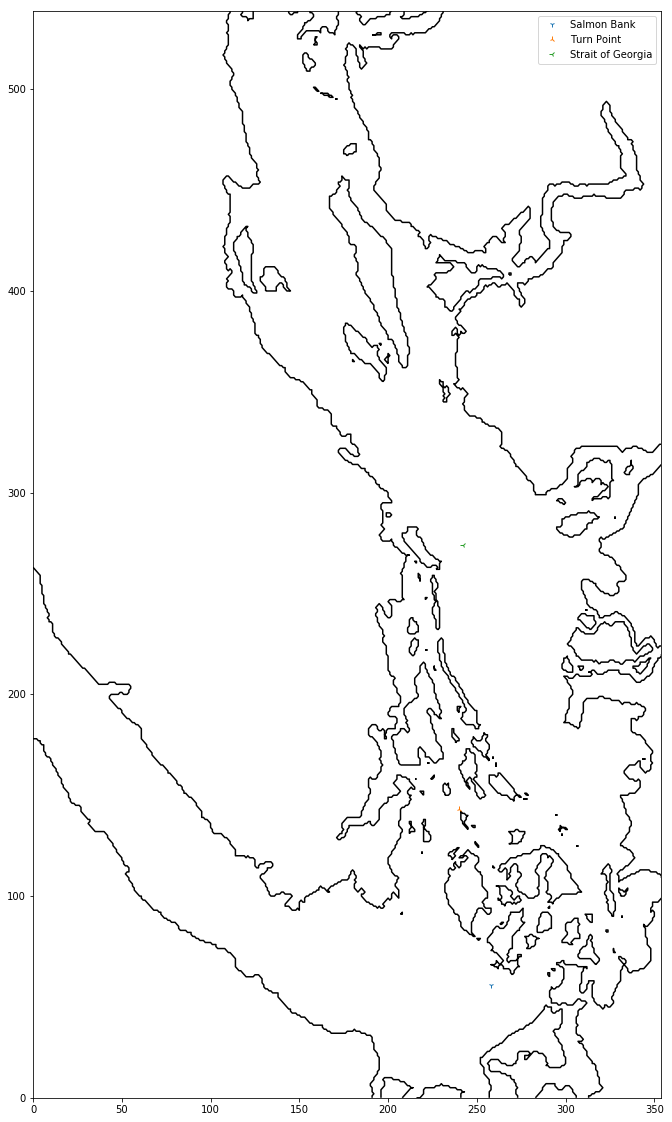

In [5]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(111)
ax.contour(nemo_mask.isel(time=0).values, levels=[-1,1], colors= "k")
viz_tools.set_aspect(ax)
ax.plot([258],[56],"1", label="Salmon Bank")
ax.plot([240], [143], "2", label = 'Turn Point')
ax.plot([242], [274], "3", label = 'Strait of Georgia')
ax.legend()

In [6]:
mask_array = nemo_mask.isel(time=0).values

In [7]:
salmon_lat = lat.values[56][258]
turn_lat = lat.values[143][240]
sog_lat = lat.values[274][242]
salmon_lon = lon.values[56][258]
turn_lon = lon.values[143][240]
sog_lon = lon.values[274][242]

In [8]:
salmon_coords = (salmon_lat, salmon_lon)
turn_coords = (turn_lat, turn_lon)
sog_coords = (sog_lat, sog_lon)

In [9]:
print(salmon_coords)

(48.38138198852539, -122.85613250732422)


In [10]:
print(turn_coords)

(48.691226959228516, -123.24085235595703)


In [11]:
print(sog_coords)

(49.21060562133789, -123.66905975341797)


In [12]:
HRDPS = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1")

In [13]:
HRDPS_lon = HRDPS.longitude.values - 360

In [14]:
HRDPS_lat = HRDPS.latitude.values

In [15]:
## Finding Salmon Bank
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(salmon_coords[1], salmon_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDsalmon = np.unravel_index(np.argmin(distances), distances.shape)
print("Salmon bank is off by {} km".format(np.min(distances)))
## Finding Turn Point
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(turn_coords[1], turn_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDturn = np.unravel_index(np.argmin(distances), distances.shape)
print("Turn point is off by {} km".format(np.min(distances)))
## Finding SoG
distances = np.zeros([266,256])
for i in range(266):
    for j in range(256):
        distances[i][j] = geo_tools.haversine(sog_coords[1], sog_coords[0], HRDPS_lon[i][j], HRDPS_lat[i][j])
HDsog = np.unravel_index(np.argmin(distances), distances.shape)
print("Strait of Georgia is off by {} km".format(np.min(distances)))

Salmon bank is off by 1.1329073367672617 km
Turn point is off by 1.1274441097948285 km
Strait of Georgia is off by 0.9080124895734909 km


In [16]:
print(HDsalmon)
print(HDturn)
print(HDsog)

(99, 159)
(116, 150)
(143, 141)


In [17]:
loadmask = open('GEM_mask.pickle', 'rb')
land_mask = pickle.load(loadmask)

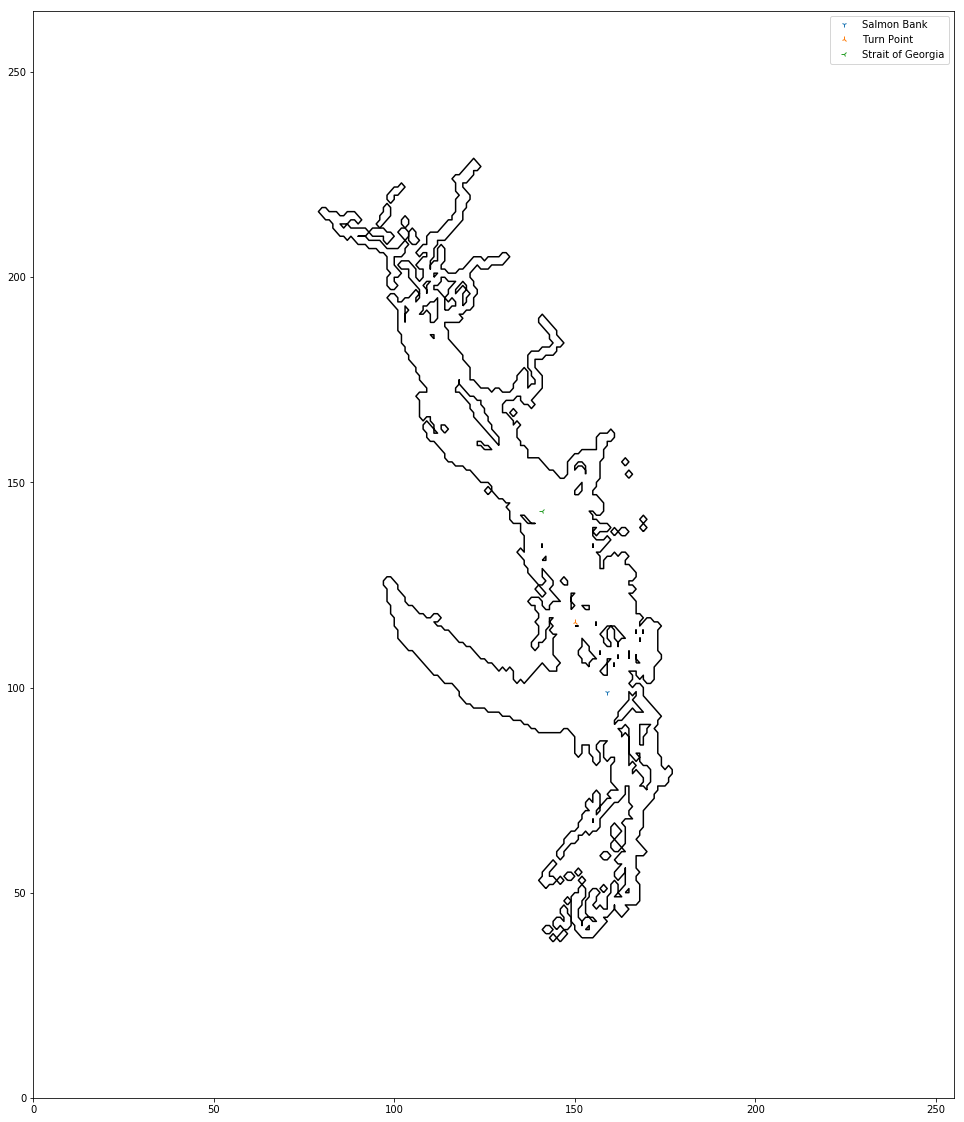

In [18]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(111)
ax.contour(land_mask, levels=[-1,1], colors= "k")
ax.plot([HDsalmon[1]],[HDsalmon[0]],"1", label="Salmon Bank")
ax.plot([HDturn[1]], [HDturn[0]], "2", label = 'Turn Point')
ax.plot([HDsog[1]], [HDsog[0]], "3", label = 'Strait of Georgia')
viz_tools.set_aspect(ax)
ax.legend()

# Pretty image of chosen location with overlaid bathymetry

In [6]:
SB=(np.array([256]), np.array([268]))
TP=(np.array([343]), np.array([250]))
SoG=(np.array([474]), np.array([252]))



In [39]:
Bathymetry = grid1.bathymetry
Latitude = grid1.latitude
Longitude = grid1.longitude

In [40]:
Land_Mask = nemo_mask1.isel(time = 0).values

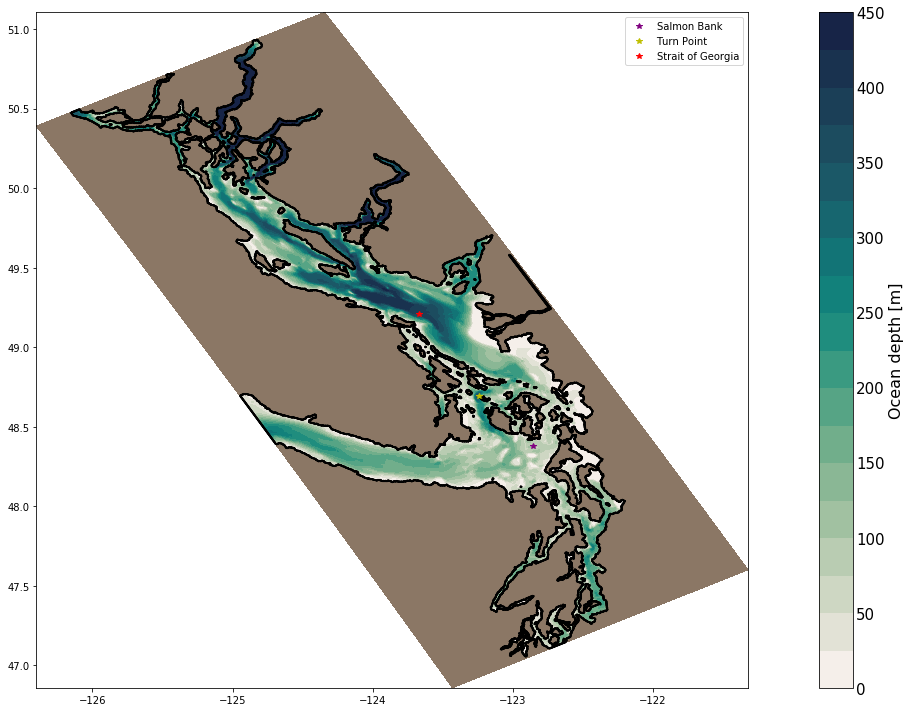

In [84]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(111)
bathy = ax.contourf(Longitude, Latitude, Bathymetry,20, cmap=cmocean.cm.tempo)
cbar = plt.colorbar(bathy, extend = "both")
cbar.set_label('Ocean depth [m]', fontsize=16)
cbar.ax.tick_params(axis='y', length=0, labelsize=15)
plt.contourf(Longitude, Latitude,Land_Mask, colors = "#8b7765", levels = [-0.1, 0.1])
plt.contour(Longitude, Latitude,Land_Mask, colors = 'k')
plt.plot(-122.85613250732422, 48.38138198852539,  "*", color ='Purple',label = "Salmon Bank")
plt.plot(-123.24085235595703, 48.691226959228516, "y*", label = "Turn Point")
plt.plot(-123.66905975341797, 49.21060562133789, "r*", label = "Strait of Georgia")
plt.legend()
viz_tools.set_aspect(ax)
plt.tight_layout()

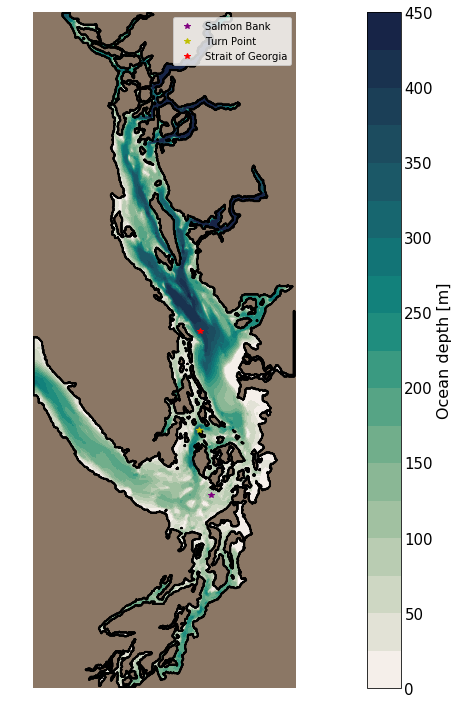

In [83]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(111)
bathy = ax.contourf(Bathymetry,20, cmap=cmocean.cm.tempo)
cbar = plt.colorbar(bathy, extend = "both")
cbar.set_label('Ocean depth [m]', fontsize=16)
cbar.ax.tick_params(axis='y', length=0, labelsize=15)
viz_tools.set_aspect(ax)
plt.contourf(Land_Mask, colors = "#8b7765", levels = [-0.1, 0.1])
plt.contour(Land_Mask, colors = 'k')
plt.plot([268], [256], "*", color ='Purple',label = "Salmon Bank")
plt.plot([250], [343], "y*", label = "Turn Point")
plt.plot([252], [474],  "r*", label = "Strait of Georgia")
plt.legend()
plt.axis('off')
plt.tight_layout()